In [125]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from prophet.serialize import model_to_json

In [126]:
# Load the data
df = pd.read_csv('SF_hospital_load.csv')
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,2015-01-01 01:00:00,778.007969
1,2015-01-01 02:00:00,776.241750
2,2015-01-01 03:00:00,779.357338
3,2015-01-01 04:00:00,778.737196
4,2015-01-01 05:00:00,787.835835


In [127]:
# Create and fit the model
model = Prophet()
model.fit(df)

20:17:53 - cmdstanpy - INFO - Chain [1] start processing
20:17:53 - cmdstanpy - INFO - Chain [1] done processing


In [128]:
# Make future dataframe for prediction
future = model.make_future_dataframe(periods=8, freq='h')
forecast = model.predict(future)

In [129]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01 01:00:00,1021.923911,535.385422,752.132391,1021.923911,1021.923911,-374.980728,-374.980728,-374.980728,-207.559262,-207.559262,-207.559262,-167.421466,-167.421466,-167.421466,0.0,0.0,0.0,646.943183
1,2015-01-01 02:00:00,1021.925408,529.250091,746.616529,1021.925408,1021.925408,-383.413940,-383.413940,-383.413940,-213.350216,-213.350216,-213.350216,-170.063724,-170.063724,-170.063724,0.0,0.0,0.0,638.511468
2,2015-01-01 03:00:00,1021.926906,528.591149,742.085258,1021.926906,1021.926906,-381.654999,-381.654999,-381.654999,-209.644773,-209.644773,-209.644773,-172.010227,-172.010227,-172.010227,0.0,0.0,0.0,640.271907
3,2015-01-01 04:00:00,1021.928403,560.814558,762.411619,1021.928403,1021.928403,-354.654082,-354.654082,-354.654082,-181.408889,-181.408889,-181.408889,-173.245193,-173.245193,-173.245193,0.0,0.0,0.0,667.274321
4,2015-01-01 05:00:00,1021.929901,623.632846,832.536705,1021.929901,1021.929901,-293.306186,-293.306186,-293.306186,-119.548101,-119.548101,-119.548101,-173.758084,-173.758084,-173.758084,0.0,0.0,0.0,728.623715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8763,2016-01-01 04:00:00,1034.804258,705.936524,920.382638,1034.804258,1034.804258,-215.789065,-215.789065,-215.789065,-181.408889,-181.408889,-181.408889,-34.380176,-34.380176,-34.380176,0.0,0.0,0.0,819.015193
8764,2016-01-01 05:00:00,1034.818369,788.867818,991.450586,1034.818369,1034.818369,-145.566065,-145.566065,-145.566065,-119.548101,-119.548101,-119.548101,-26.017963,-26.017963,-26.017963,0.0,0.0,0.0,889.252304
8765,2016-01-01 06:00:00,1034.832480,875.736420,1091.854587,1034.832480,1034.832480,-47.567676,-47.567676,-47.567676,-29.686583,-29.686583,-29.686583,-17.881093,-17.881093,-17.881093,0.0,0.0,0.0,987.264804
8766,2016-01-01 07:00:00,1034.846591,981.681563,1199.322962,1034.846591,1034.846591,57.595364,57.595364,57.595364,67.606280,67.606280,67.606280,-10.010916,-10.010916,-10.010916,0.0,0.0,0.0,1092.441956


In [130]:
# Calculate mean absolute error for the last 8 hours
last_8_hours = df.iloc[-8:]
predictions = forecast.iloc[-16:-8]
mae = (abs(predictions['yhat'] - last_8_hours['y'])).mean()
print(f"Mean Absolute Error for the last 8 hours: {mae}")

Mean Absolute Error for the last 8 hours: 59.444964759140916


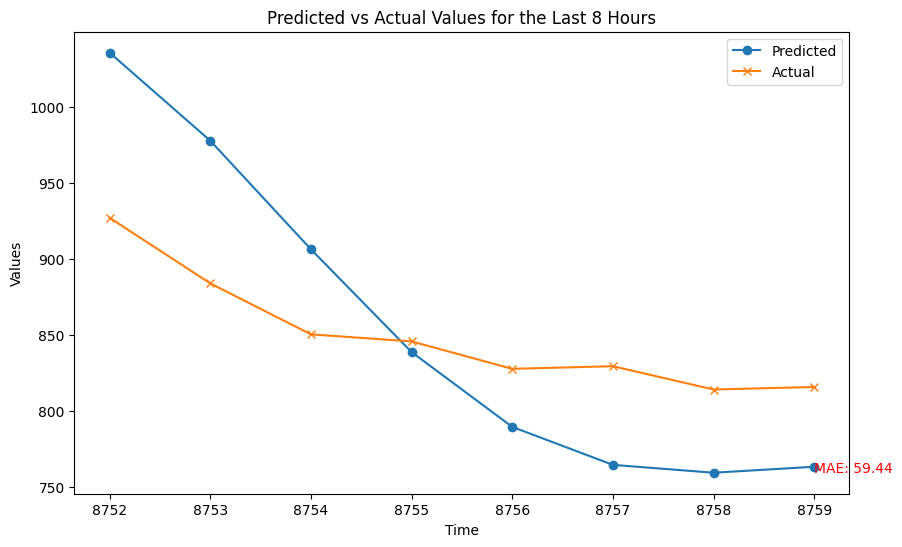

In [131]:
import matplotlib.pyplot as plt

# Visualize predictions vs actuals for the last 8 hours
plt.figure(figsize=(10, 6))

# Plot the predicted values (yhat)
plt.plot(predictions.index, predictions['yhat'], label='Predicted', marker='o')

# Plot the actual values (y)
plt.plot(last_8_hours.index, last_8_hours['y'], label='Actual', marker='x')

# Adding title and labels
plt.title('Predicted vs Actual Values for the Last 8 Hours')
plt.xlabel('Time')
plt.ylabel('Values')

# Show MAE in the plot
plt.text(predictions.index[-1], predictions['yhat'].min(), f'MAE: {mae:.2f}', fontsize=10, color='red')

# Adding legend
plt.legend()

# Display the plot
plt.show()


In [132]:
# Save the model using Prophet's serialization function
with open('serialized_model.json', 'w') as fout:
    fout.write(model_to_json(model))

print("Model training completed and saved.")

Model training completed and saved.
